### Importacíon de dependencias

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

### Creación del dataframe

In [27]:
train = pd.read_csv("personality_dataset.csv")
train.tail()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
2895,3.0,No,7.0,6.0,No,6.0,6.0,Extrovert
2896,3.0,No,8.0,3.0,No,14.0,9.0,Extrovert
2897,4.0,Yes,1.0,1.0,Yes,4.0,0.0,Introvert
2898,11.0,Yes,1.0,NaN,Yes,2.0,0.0,Introvert
2899,3.0,No,6.0,6.0,No,6.0,9.0,Extrovert


### Limpieza de datos

Se eliminan los valores nulos de las columnas a trabajar

In [ ]:
train.isnull().sum()

Time_spent_Alone             63
Stage_fear                   73
Social_event_attendance      62
Going_outside                66
Drained_after_socializing    52
Friends_circle_size          77
Post_frequency               65
Personality                   0
dtype: int64

In [31]:
train.dropna(subset=["Time_spent_Alone", "Friends_circle_size"], inplace=True)
train.isnull().sum()


Time_spent_Alone              0
Stage_fear                   68
Social_event_attendance      57
Going_outside                62
Drained_after_socializing    49
Friends_circle_size           0
Post_frequency               61
Personality                   0
dtype: int64

### Seleccionar columnas a trabajar

In [33]:
train[['Time_spent_Alone', 'Friends_circle_size']].head(10)

,Time_spent_Alone,Friends_circle_size
0,4.0,13.0
1,9.0,0.0
2,9.0,5.0
3,0.0,14.0
4,3.0,8.0
5,1.0,6.0
6,4.0,7.0
7,2.0,7.0
8,10.0,0.0
9,0.0,13.0


### Graficar columnas

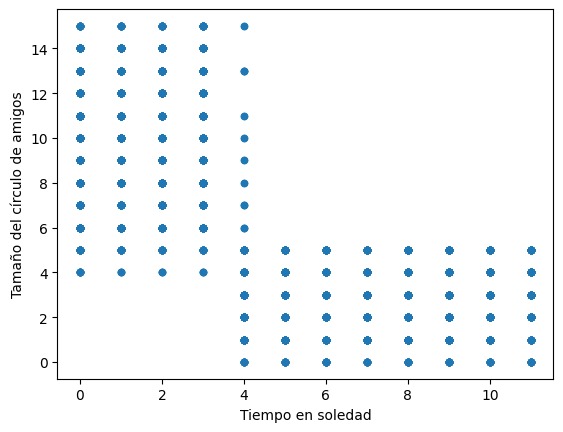

In [34]:
train.plot.scatter(x='Time_spent_Alone', y='Friends_circle_size')
plt.xlabel('Tiempo en soledad')
plt.ylabel('Tamaño del círculo de amigos')
plt.show()

### Crear modelo de regresion


In [35]:
modelo = LinearRegression()

### Entrenar modelo 

In [36]:
modelo.fit(train[["Time_spent_Alone"]], train[["Friends_circle_size"]])

LinearRegression()

### Realizar predicción

In [47]:
int(modelo.predict([[9]]))


c:\Users\mateo\ipf\tlp3-python\regresion-linear\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\mateo\AppData\Local\Temp\ipykernel_10252\2999294690.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  int(modelo.predict([[9]]))


2

### Guardar modelo 

In [48]:
import joblib

joblib.dump(modelo, "personality_model.pkl")

['personality_model.pkl']

### Cargar modelo

In [54]:
reg = joblib.load("personality_model.pkl")

int(reg.predict([[2]]))

c:\Users\mateo\ipf\tlp3-python\regresion-linear\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\mateo\AppData\Local\Temp\ipykernel_10252\3823518104.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  int(reg.predict([[2]]))


8

### Comparacion de datos de entrenamiento con los resultados predecidos.

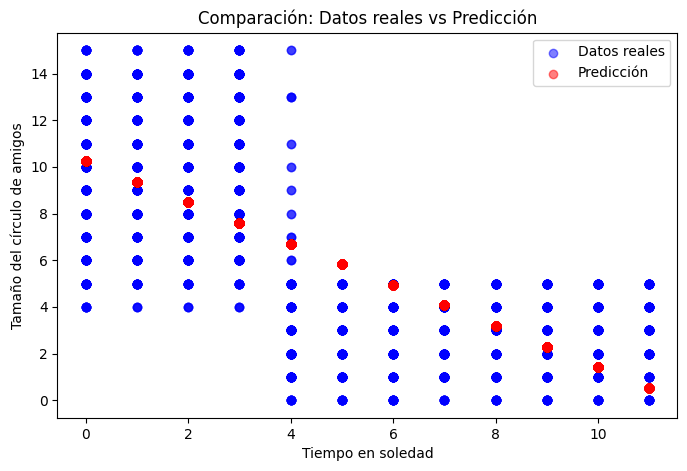

In [ ]:
y_pred = modelo.predict(train[["Time_spent_Alone"]])

plt.figure(figsize=(8, 5))
plt.scatter(train["Time_spent_Alone"], train["Friends_circle_size"], color='blue', label='Datos reales', alpha=0.5)
plt.scatter(train["Time_spent_Alone"], y_pred, color='red', label='Predicción', alpha=0.5)
plt.xlabel('Tiempo en soledad')
plt.ylabel('Tamaño del círculo de amigos')
plt.title('Comparación: Datos reales vs Predicción')
plt.legend() 
plt.show()